# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [23]:
def bivariada_qualitativa(data:pd.DataFrame,target:str,explic:str) -> pd.DataFrame:
    if target not in data.columns or explic not in data.columns:
        raise Exception("can't be found on the axis")
    
    tab = pd.crosstab(df[explic],(df[target]).astype(int),margins=True)
    tab[f'perc_{explic}'] = tab[1]/tab['All']
    tab['chance'] = tab[1]/tab[0]
    tab['odds_ratio_all'] = tab['chance']/tab.loc['All','chance']
    tab['logito'] = np.log(tab['chance'])
    tab['WOE'] = np.log(tab['odds_ratio_all'])
    
    return tab
    

In [24]:
display(bivariada_qualitativa(data=df,target='flag_doente',explic='sex'))

flag_doente,0,1,All,perc_sex,chance,odds_ratio_all,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [25]:
display(bivariada_qualitativa(data=df,target='flag_doente',explic='cp'))

flag_doente,0,1,All,perc_cp,chance,odds_ratio_all,logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [26]:
display(bivariada_qualitativa(data=df,target='flag_doente',explic='restecg'))

flag_doente,0,1,All,perc_restecg,chance,odds_ratio_all,logito,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [27]:
def bivariada_quantitativa(data:pd.DataFrame,target:str,explic:str,broke:int=5) -> pd.DataFrame:
    if target not in data.columns or explic not in data.columns:
        raise Exception("can't be found on the axis")
    else: 
        df1 = df.copy()
        df1[f"cat_{explic}"] = pd.qcut(df[explic],broke,duplicates='drop')
        tab = pd.crosstab(df1[f'cat_{explic}'],(df1[target]).astype(int),margins=True)
        tab[f'perc_{explic}'] = tab[1]/tab['All']
        tab['chance'] = tab[1]/tab[0]
        tab['odds_ratio_all'] = tab['chance']/tab.loc['All','chance']
        tab['logito'] = np.log(tab['chance'])
        tab['WOE'] = np.log(tab['odds_ratio_all'])
    
    return tab

In [28]:
display(bivariada_quantitativa(data=df,target='flag_doente',explic='age',broke=6))

flag_doente,0,1,All,perc_age,chance,odds_ratio_all,logito,WOE
cat_age,,,,,,,,
"(28.999, 44.0]",41,14,55,0.254545,0.341463,0.402878,-1.074515,-0.909122
"(44.0, 51.0]",33,18,51,0.352941,0.545455,0.643558,-0.606136,-0.440743
"(51.0, 56.0]",33,23,56,0.410714,0.696970,0.822324,-0.361013,-0.195621
"(56.0, 59.0]",19,31,50,0.620000,1.631579,1.925028,0.489548,0.654941
"(59.0, 63.667]",11,29,40,0.725000,2.636364,3.110530,0.969401,1.134793
"(63.667, 77.0]",27,24,51,0.470588,0.888889,1.048761,-0.117783,0.047609
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [29]:
reglog = smf.logit(formula='''flag_doente ~ 
                              sex 
                              + C(cp, Treatment(reference=4))
                              + trestbps 
                              + age
                              ''', data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Aug 2024   Pseudo R-squ.:                  0.3097
Time:                        14:28:37   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -5.8619      1.413     -4.147      0.000      -8.632      -3.092
C(cp, Treatment(reference=4))[T.1.0]    -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(reference=4))[T.2.0]    -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(reference=4))[T.3.0]    -2.4074      0.360     -6.690      0.000      -3.113      -1.702
sex                                      1.8094      0.353      5.130      0.000       1.118       2.501
trestbps                                 0.0193      0.009      2.261      0.024       0.003       0.036
age                                      0.0567      0.018      3.120      0.002       0.021       0.092
========================================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [30]:
df['predito1']=reglog.predict(df)
cat_pred = pd.qcut(df['predito1'],5,duplicates='drop')
cat_pred.value_counts().sort_index()

predito1
(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: count, dtype: int64

In [38]:
group_reg =df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns={'flag_doente':'Contagem'})
qualid

C:\Users\User\AppData\Local\Temp\ipykernel_12884\183485220.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg =df.groupby(cat_pred)


In [34]:
qualid['predito1'] = group_reg['predito1'].mean()
qualid

,Contagem,predito1
predito1,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [35]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,Contagem,predito1,pct_doente
predito1,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


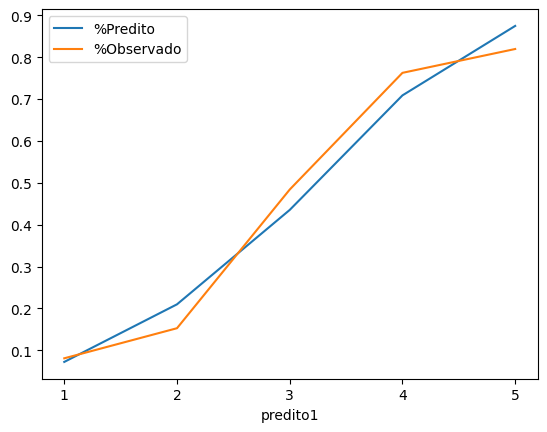

In [37]:
fig,ax = plt.subplots()
qualid['predito1'].plot(label='%Predito')
qualid['pct_doente'].plot(label='%Observado')
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([1,2,3,4,5])
ax.legend();


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [40]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'],df['predito1']>.5)
print(f"Acurácia: {round(acc*100,2)}%")

#AUC
fpr,tpr,thresholds = metrics.roc_curve(df['flag_doente'],df['predito1'])
auc_ = metrics.auc(fpr,tpr)
#GINI
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente']==1,'predito1'],df.loc[df['flag_doente']!=1,'predito1']).statistic
print(f"""KS:{round(ks*100,2)}%\nAUC:{round(auc_*100,2)}%\nGINI:{round(gini*100,2)}%
""")

Acurácia: 79.54%
KS:59.3%
AUC:85.19%
GINI:70.39%



6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito1
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


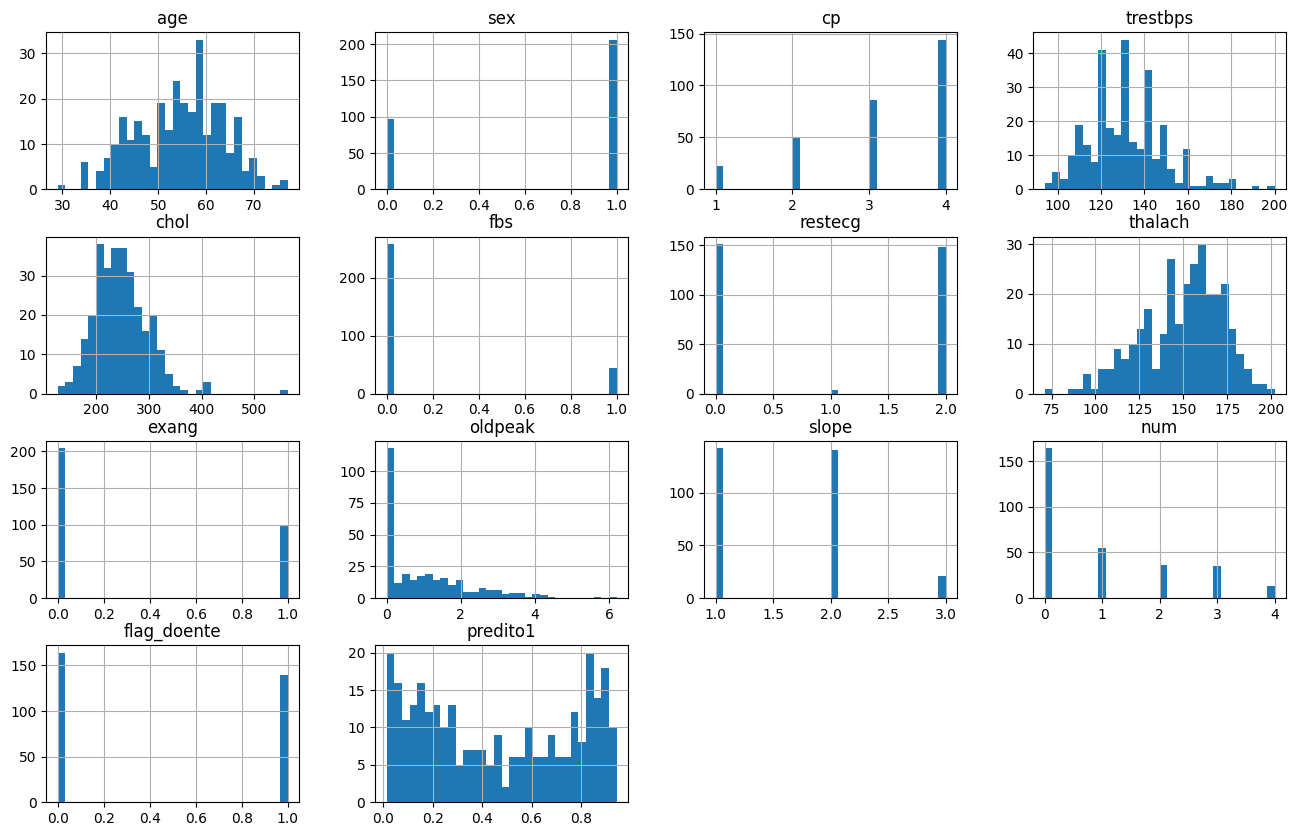

In [44]:
df.hist(bins=30,figsize=(16,10));

In [63]:
reglog2 = smf.logit("flag_doente ~ sex + C(cp,Treatment(reference=4)) + age + thalach + oldpeak + exang  + trestbps",data=df).fit()
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.407904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 Aug 2024   Pseudo R-squ.:                  0.4086
Time:                        15:09:59   Log-Likelihood:                -123.59
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.220e-32
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.0979      2.178     -0.963      0.335      -6.367       2.171
C(cp, Treatment(reference=4))[T.1.0]    -2.3275      0.599     -3.888      0.000      -3.501      -1.154
C(cp, Treatment(reference=4))[T.2.0]    -1.5063      0.491     -3.071      0.002      -2.468      -0.545
C(cp, Treatment(reference=4))[T.3.0]    -2.0107      0.412     -4.883      0.000      -2.818      -1.204
sex                                      1.7759      0.389      4.569      0.000       1.014       2.538
age                                      0.0289      0.021      1.408      0.159      -0.011       0.069
thalach                                 -0.0222      0.009     -2.465      0.014      -0.040      -0.005
oldpeak                                  0.6758      0.174      3.888      0.000       0.335       1.017
exang                                    0.7882      0.374      2.106      0.035       0.055       1.522
trestbps                                 0.0189      0.010      1.942      0.052      -0.000       0.038
========================================================================================================
"""

In [64]:
df['predito1'] = reglog2.predict(df)

In [65]:
acc = metrics.accuracy_score(df['flag_doente'],df['predito1']>.5)
#AUC
fpr,tpr,thresholds = metrics.roc_curve(df['flag_doente'],df['predito1'])
auc_ = metrics.auc(fpr,tpr)
#GINI
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente']==1,'predito1'],df.loc[df['flag_doente']!=1,'predito1']).statistic


print(f"Acurácia: {round(acc*100,2)}%")
print(f"""KS:{round(ks*100,2)}%\nAUC:{round(auc_*100,2)}%\nGINI:{round(gini*100,2)}%
""")

Acurácia: 81.85%
KS:65.88%
AUC:89.53%
GINI:79.07%

